Лабораторна робота №1

з предмету «Вступ до машинного навчання»

студента групи ДА-21 Cімкова Микити

In [3]:
import requests
import numpy as np
import io
import matplotlib.pyplot as plt

Зчитування файлів з гугл диску

In [4]:
# Функція для завантаження даних
def load_data_from_url(url):
    response = requests.get(url)
    
    if response.status_code == 200:
        # Перетворюємо текст у файлоподібний об'єкт
        csv_data = io.StringIO(response.text)
        
        # Використовуємо np.loadtxt для читання CSV з пам'яті
        data = np.loadtxt(csv_data, delimiter=',', skiprows=1)
        x = data[:, 1]  # Другий стовпець - x
        y = data[:, 2]  # Третій стовпець - y
        return x, y
    else:
        raise Exception(f"Помилка при завантаженні даних, статус код: {response.status_code}")

# Посилання на ваші дані
train_url = 'https://drive.google.com/uc?export=download&id=1ZJ7USoXN5Iijv_j-o8igJKD6w5jr5QPF'
test_url = 'https://drive.google.com/uc?export=download&id=1Dtf7FRjjhAGEikPFYYXmBBEdFFFWa-kK'

# Завантажуємо тренувальні та тестові дані
x_train, y_train = load_data_from_url(train_url)
x_test, y_test = load_data_from_url(test_url)

Таблична візуалізація даних

In [5]:
def print_data(x, y, data_name="Дані"):
    print(f"\n{data_name}:")
    print(f"{'Index':<5} {'X':<10} {'Y':<10}")
    print('-' * 25)
    for i in range(min(len(x), 11)):  # Виводимо перші 5 рядків
        print(f"{i:<5} {x[i]:<10.5f} {y[i]:<10.5f}")
    if len(x) > 11:
        print(f"... (всього {len(x)} рядків)")

# Виводимо перші 5 рядків тренувальних та тестових даних
print_data(x_train, y_train, "Тренувальні дані")


Тренувальні дані:
Index X          Y         
-------------------------
0     0.00000    20.14901  
1     0.01010    19.97872  
2     0.02020    20.23471  
3     0.03030    20.51752  
4     0.04040    20.01056  
5     0.05051    20.03077  
6     0.06061    20.59498  
7     0.07071    20.37164  
8     0.08081    20.02077  
9     0.09091    20.34459  
10    0.10101    20.06299  
... (всього 60 рядків)


Графічна візуалізація даних

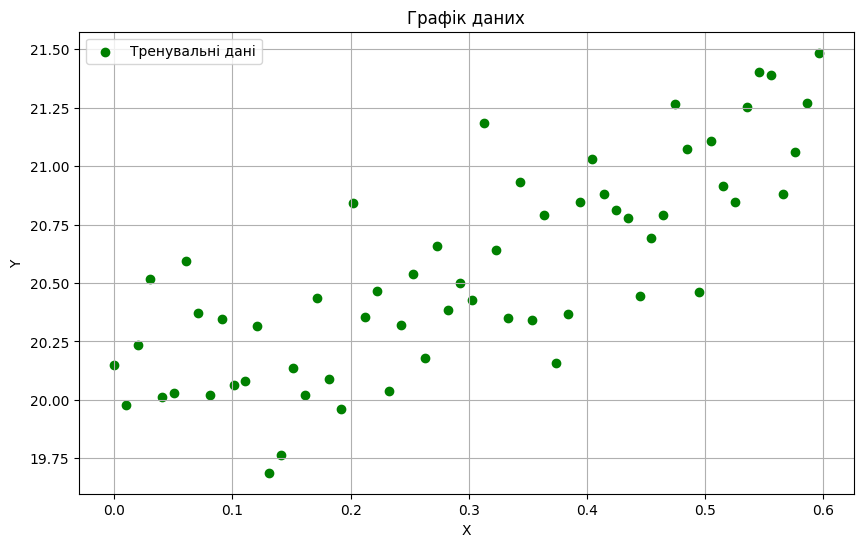

In [6]:
def plot_data(x_train, y_train):
    plt.figure(figsize=(10, 6))
    
    # Побудова точок тренувальних даних
    plt.scatter(x_train, y_train, color='green', label='Тренувальні дані', marker='o')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Графік даних')
    plt.legend()
    plt.grid(True)
    plt.show()

# Побудова графіка
plot_data(x_train, y_train)

Градієнтний спуск

In [7]:
m = len(y_train)
# Функція для передбачення значень лінійної регресії
def predict(x, w_0, w_1):
    return w_1 * x + w_0

# Функція для обчислення вартості (середньоквадратична помилка)
def mean_squared_error(x, y, k, b):
    y_pred = k*x + b
    mse = np.mean((y - y_pred) ** 2)
    return mse

# Функція для виконання градієнтного спуску
def gradient_descent(x_train, y_train, w_0, w_1, a, epochs):
    m = len(y_train)  
    cost_history = [] 
    w_0_history = []   
    w_1_history = []   
    
    for epoch in range(epochs):
        y_pred = predict(x_train, w_0, w_1)
        loss = ((y_pred - y_train)**2).mean()
        w_1_grad = (-2/m) * np.sum(x_train * (y_train - y_pred))
        w_0_grad = (-2/m) * np.sum(y_train - y_pred)
        w_1 -= a * w_1_grad
        w_0 -= a * w_0_grad
        
        # Обчислюємо помилку і зберігаємо її в історію
        mse = mean_squared_error(x_train, y_train, w_1, w_0)
        cost_history.append(mse)
        w_0_history.append(w_0)
        w_1_history.append(w_1)
    
    return w_1, w_0, cost_history, w_0_history, w_1_history


w_0_init = 0
w_1_init = 0
alpha = 0.01 
epochs = 10000

w_1, w_0, cost_history, w_0_history, w_1_history = gradient_descent(x_train, y_train, w_0_init, w_1_init, alpha, epochs)

Таблиця змін коефіцієнтів та функції втрат

In [8]:
print(f"{'Epoch':<10} {'w_0':<15} {'w_1':<15} {'Cost':<15}")
print("-" * 50)
for epoch in range(len(cost_history)):
    print(f"{epoch:<10} {w_0_history[epoch]:<15.5f} {w_1_history[epoch]:<15.5f} {cost_history[epoch]:<15.5f}")

Epoch      w_0             w_1             Cost           
--------------------------------------------------
0          0.41099         0.12368         404.25742      
1          0.81303         0.24461         386.82412      
2          1.20630         0.36286         370.14353      
3          1.59100         0.47848         354.18315      
4          1.96732         0.59154         338.91188      
5          2.33544         0.70208         324.29997      
6          2.69554         0.81016         310.31895      
7          3.04779         0.91584         296.94157      
8          3.39237         1.01917         284.14178      
9          3.72944         1.12020         271.89463      
10         4.05917         1.21897         260.17627      
11         4.38171         1.31555         248.96386      
12         4.69723         1.40997         238.23555      
13         5.00587         1.50229         227.97045      
14         5.30779         1.59255         218.14855      
15   

Візуалізація результатів

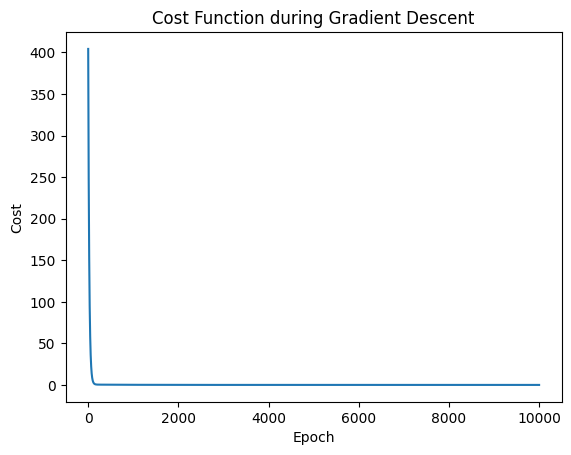

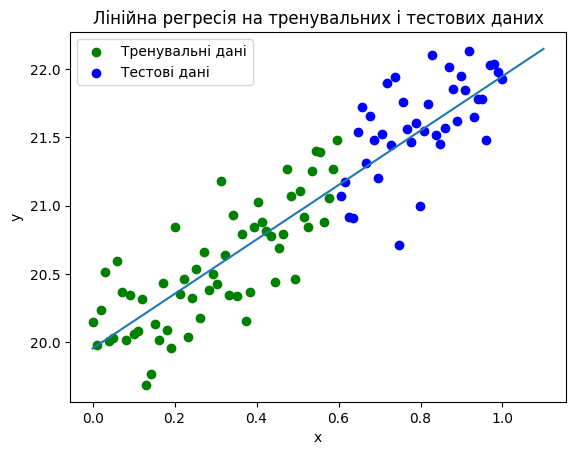

In [10]:
# Графік вартості за епохами

plt.plot(cost_history)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost Function during Gradient Descent')
plt.show()

# Прогноз на тестовому наборі
x = np.linspace(0, 1.1)
# Візуалізація результатів на тренувальних і тестових даних
plt.scatter(x_train, y_train, color='green', label='Тренувальні дані')  # Тренувальні дані
plt.scatter(x_test, y_test, color='blue', label='Тестові дані')  # Тестові дані
plt.plot( x,  w_1 * x + w_0)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Лінійна регресія на тренувальних і тестових даних')
plt.legend()
plt.show()

Висновок:
Було знайдено розв'язок за допомогою методу лінійної регресії, що дозволяє передбачати значення цільової змінної (target) на основі значення ознаки (feature). Варто зазначити, що ефективність та точність моделі значною мірою залежать від таких гіперпараметрів, як кількість епох та швидкість навчання (learning rate).